In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline


# 그래프 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
import os # 운영체제(operating system) 관련 패키지 호출

# 현재 작업 디렉토리 확인
os.getcwd()

# 작업 디렉토리 변경
os.chdir('c:/data/p_3')

In [3]:
food_ori = pd.read_csv('food_defect_data.csv')
food_ori.head()

,Lot_ID,Line,Shift,Operator,Temp,Humidity,Weight,Defect,Defect_Type
0,L046,C,야간,O2,24.4,42.4,NaN,0,양품
1,L003,A,주간,O8,26.4,42.9,99.92,0,양품
2,L029,B,주간,O2,24.3,57.7,101.77,0,양품
3,L035,A,주간,O4,23.5,44.3,99.82,0,양품
4,L039,C,주간,O3,24.4,38.2,100.60,0,양품


In [4]:
grr = pd.read_csv('gage_rr_sample.csv')
grr.head()

,Part,Operator,Trial,Weight
0,P1,O1,1,100.26
1,P1,O1,2,100.26
2,P1,O2,1,100.30
3,P1,O2,2,99.87
4,P1,O3,1,99.80


In [5]:
food_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Lot_ID       500 non-null    object 
 1   Line         500 non-null    object 
 2   Shift        500 non-null    object 
 3   Operator     500 non-null    object 
 4   Temp         475 non-null    float64
 5   Humidity     475 non-null    float64
 6   Weight       475 non-null    float64
 7   Defect       500 non-null    int64  
 8   Defect_Type  500 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 35.3+ KB


In [6]:
grr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Part      60 non-null     object 
 1   Operator  60 non-null     object 
 2   Trial     60 non-null     int64  
 3   Weight    60 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.0+ KB


In [7]:
food_ori.loc[food_ori.isnull().any(axis=1)]

,Lot_ID,Line,Shift,Operator,Temp,Humidity,Weight,Defect,Defect_Type
0,L046,C,야간,O2,24.4,42.4,NaN,0,양품
13,L010,B,야간,O4,22.5,49.7,NaN,0,양품
15,L047,B,야간,O7,25.9,46.7,NaN,0,양품
17,L048,B,야간,O9,NaN,59.1,98.68,0,양품
18,L026,B,주간,O4,22.4,NaN,98.70,0,양품
...,...,...,...,...,...,...,...,...,...
467,L006,B,주간,O8,25.0,55.2,NaN,0,양품
477,L047,A,야간,O10,26.6,47.8,NaN,1,포장불량
488,L043,B,야간,O1,NaN,54.2,102.16,0,양품
490,L042,C,주간,O1,28.3,NaN,101.01,0,양품


In [8]:
food = pd.read_csv('food_clean+remove_outlier_수정.csv')
food.head()

,Lot_ID,Line,Shift,Operator,Temp,Humidity,Defect,Defect_Type,Weight
0,L003,A,주간,O8,26.4,42.9,0,양품,100.190255
1,L029,B,주간,O2,24.3,57.7,0,양품,98.952307
2,L035,A,주간,O4,23.5,44.3,0,양품,99.997581
3,L018,A,야간,O9,26.5,44.4,0,양품,100.536753
4,L020,B,주간,O9,27.2,55.9,1,인쇄불량,98.838464


In [9]:
error_count = food.loc[food["Defect_Type"] != "양품", :]
error_count.head()

,Lot_ID,Line,Shift,Operator,Temp,Humidity,Defect,Defect_Type,Weight
4,L020,B,주간,O9,27.2,55.9,1,인쇄불량,98.838464
5,L043,A,주간,O2,21.8,60.3,1,기타,98.310356
7,L034,B,주간,O8,29.1,52.3,1,기타,100.974569
11,L033,A,주간,O4,24.6,50.3,1,인쇄불량,100.154044
22,L021,B,야간,O6,20.6,45.3,1,중량초과,98.696680


In [10]:
food.groupby("Line")["Defect_Type"].value_counts()

Line  Defect_Type
A     양품             133
      중량초과             5
      인쇄불량             4
      기타               2
      포장불량             2
B     양품             160
      인쇄불량             7
      포장불량             4
      중량초과             3
      기타               1
C     양품              70
      기타               2
      중량초과             2
      포장불량             1
Name: count, dtype: int64

In [11]:
error_count.groupby("Line")["Defect_Type"].value_counts()

Line  Defect_Type
A     중량초과           5
      인쇄불량           4
      기타             2
      포장불량           2
B     인쇄불량           7
      포장불량           4
      중량초과           3
      기타             1
C     기타             2
      중량초과           2
      포장불량           1
Name: count, dtype: int64

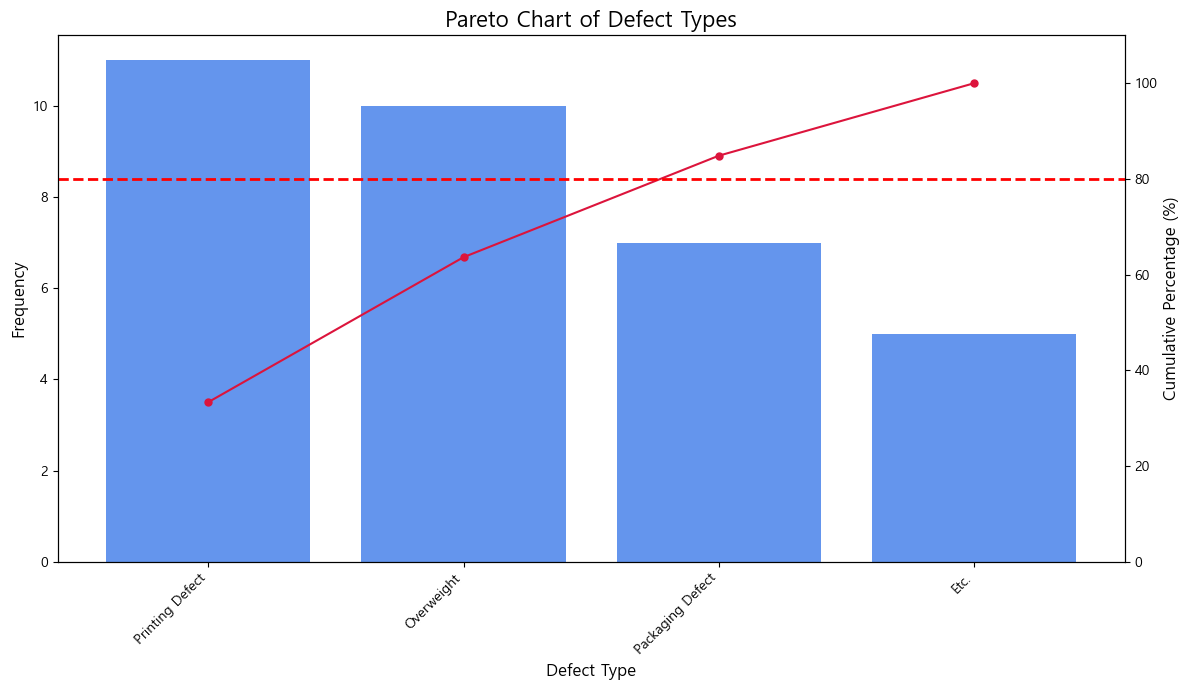

In [12]:
# 2. 불량 데이터 집계
food_counts = food['Defect_Type'].value_counts()

# '양품'은 분석에서 제외합니다.
food_counts = food_counts[food_counts.index != '양품']

# 3. 데이터 프레임 생성 및 정렬
food_defects = pd.DataFrame({'Defect_Type': food_counts.index, 'Frequency': food_counts.values})
food_defects = food_defects.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# 1. 한글 불량 유형을 영어로 매핑하는 딕셔너리(dictionary)를 생성합니다.
label_map = {
    '중량초과': 'Overweight',
    '인쇄불량': 'Printing Defect',
    '포장불량': 'Packaging Defect',
    '기타': 'Etc.'
}

# 2. map() 함수를 사용하여 'Defect_Type' 컬럼의 값을 영어로 변환합니다.
food_defects['Defect_Type'] = food_defects['Defect_Type'].map(label_map)
# ================================================================= #

# 4. 누적 백분율 계산
food_defects['Cumulative_Frequency'] = food_defects['Frequency'].cumsum()
food_defects['Cumulative_Percentage'] = (food_defects['Cumulative_Frequency'] / food_defects['Frequency'].sum()) * 100

# 5. 파레토 차트 시각화
fig, ax1 = plt.subplots(figsize=(12, 7))

# 막대 그래프 (불량 빈도)
ax1.bar(food_defects.index, food_defects['Frequency'], color='cornflowerblue')
ax1.set_xlabel('Defect Type', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)

# X축 레이블을 영어로 변환된 불량 유형 이름으로 설정합니다.
ax1.set_xticks(food_defects.index)
ax1.set_xticklabels(food_defects['Defect_Type'], rotation=45, ha="right")

# 꺾은선 그래프 (누적 백분율)
ax2 = ax1.twinx()
ax2.plot(food_defects.index, food_defects['Cumulative_Percentage'], color='crimson', marker='o', ms=5)
ax2.set_ylabel('Cumulative Percentage (%)', fontsize=12)
ax2.set_ylim([0, 110])

# 80% 기준선 추가
ax2.axhline(y=80, color='red', linestyle='--', linewidth=2)

# 차트 제목 설정 및 저장
plt.title('Pareto Chart of Defect Types', fontsize=16)
fig.tight_layout()
plt.savefig('pareto_chart.png')

# 결과 출력
plt.show()

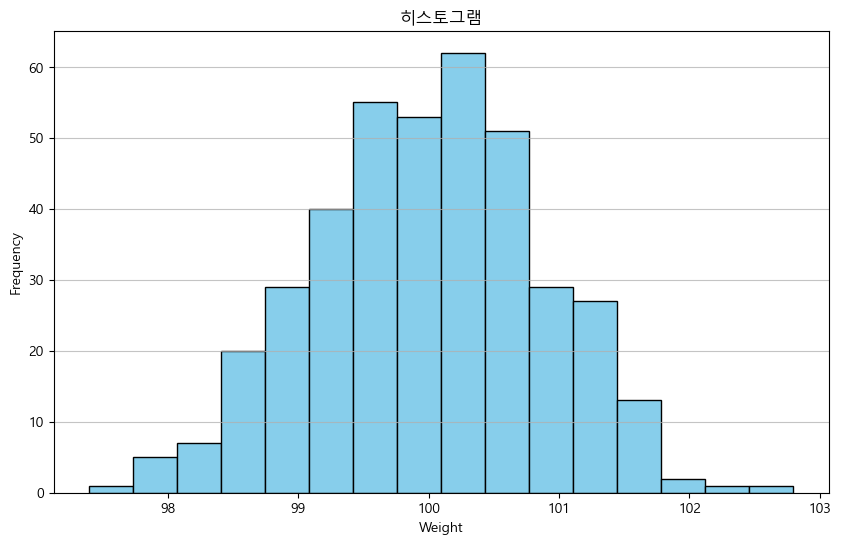

In [13]:
# 2. 히스토그램 생성
plt.figure(figsize = (10, 6))

plt.subplot

# 'Weight' 열의 데이터를 사용하여 히스토그램을 그립니다.
plt.hist(food['Weight'], bins = 16, color = 'skyblue', edgecolor = 'black')

# 3. 차트 제목 및 축 레이블 추가
plt.title('히스토그램')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.grid(axis = 'y', alpha = 0.75)

plt.savefig('weight_histogram.png')
plt.show()

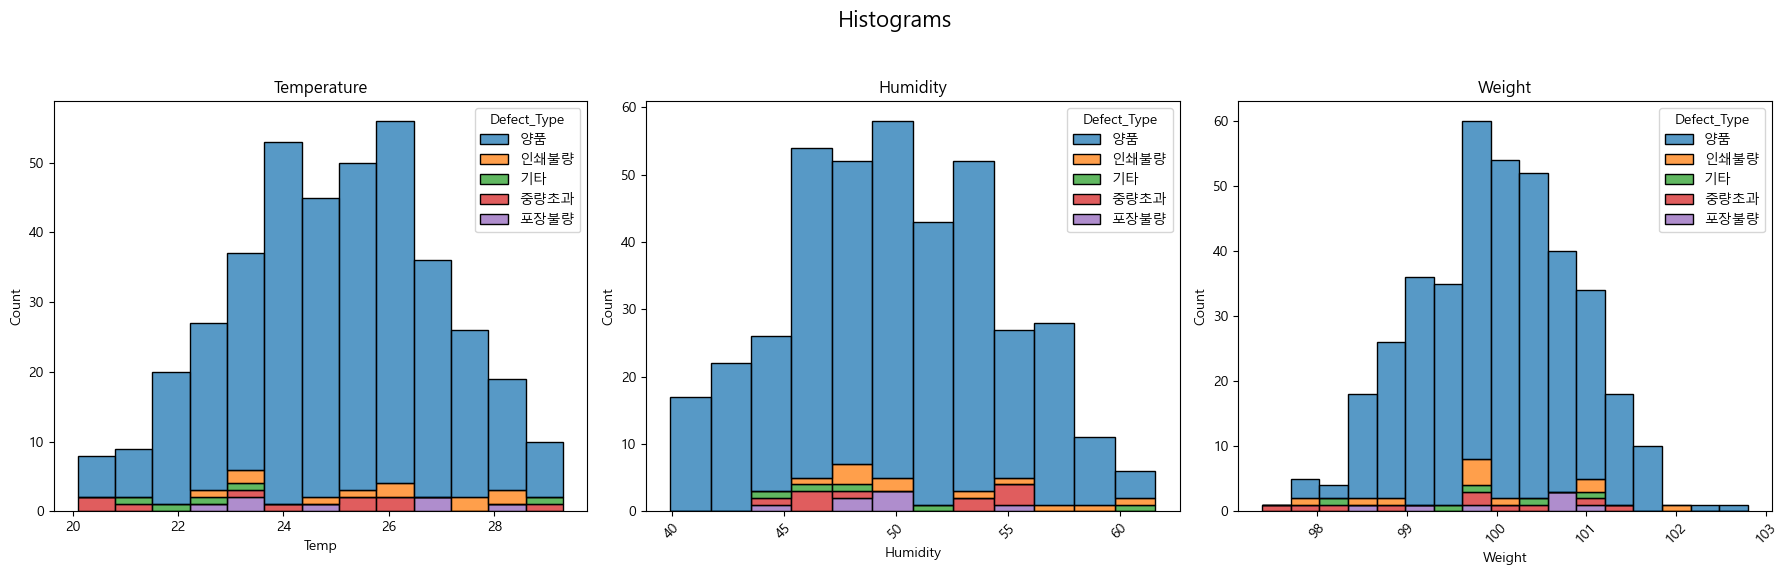

In [14]:
def create_all_hist_graphs(food):

    # food 데이터프레임이 없으므로, 예시 데이터를 생성합니다.
    # 실제 데이터를 사용하실 때는 이 부분을 제외하시면 됩니다.
    # 3행 1열의 서브플롯을 생성합니다.
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.suptitle('Histograms', fontsize = 16)

    # 1. 불량 유형에 따른 온도의 분포 (누적 히스토그램)
    ax[0].set_title("Temperature")
    sns.histplot(data = food, x = 'Temp', hue = 'Defect_Type', multiple = 'stack', ax = ax[0])

    # 2. 불량 유형에 따른 습도 분포 (다중 히스토그램)
    # x축을 'Humidity'로, 'Defect_Type'을 hue로 지정하여 불량 유형별 습도 분포를 비교합니다.
    # multiple='stack' 옵션은 각 불량 유형의 막대를 쌓아서 표현합니다.
    ax[1].set_title("Humidity")
    sns.histplot(data = food, x = 'Humidity', hue = 'Defect_Type', multiple = 'stack', ax = ax[1])
    ax[1].tick_params(axis = 'x', rotation = 45)

    # 3. 불량 유형에 따른 중량 분포 (다중 히스토그램)
    # x축을 'Weight'로, 'Defect_Type'을 hue로 지정하여 불량 유형별 중량 분포를 비교합니다.
    ax[2].set_title("Weight")
    sns.histplot(data = food, x = 'Weight', hue = 'Defect_Type', multiple = 'stack', ax = ax[2])
    ax[2].tick_params(axis = 'x', rotation = 45)

    plt.tight_layout(rect = [0, 0.03, 1, 0.95])
    plt.savefig('all_histograms_plot.png')

# 2. 수정된 함수 호출
create_all_hist_graphs(food)
plt.show()

In [15]:
print((food.loc[(food["Weight"] >= 98) & (food["Weight"] <= 102) & (food["Defect"] == 0), :]).count())

Lot_ID         359
Line           359
Shift          359
Operator       359
Temp           359
Humidity       359
Defect         359
Defect_Type    359
Weight         359
dtype: int64


In [16]:
food_numeric = food.select_dtypes(include = 'number')
food_numeric

corr = food_numeric.corr()
corr

,Temp,Humidity,Defect,Weight
Temp,1.000000,0.075690,-0.037202,0.598687
Humidity,0.075690,1.000000,0.069277,-0.542660
Defect,-0.037202,0.069277,1.000000,-0.080918
Weight,0.598687,-0.542660,-0.080918,1.000000


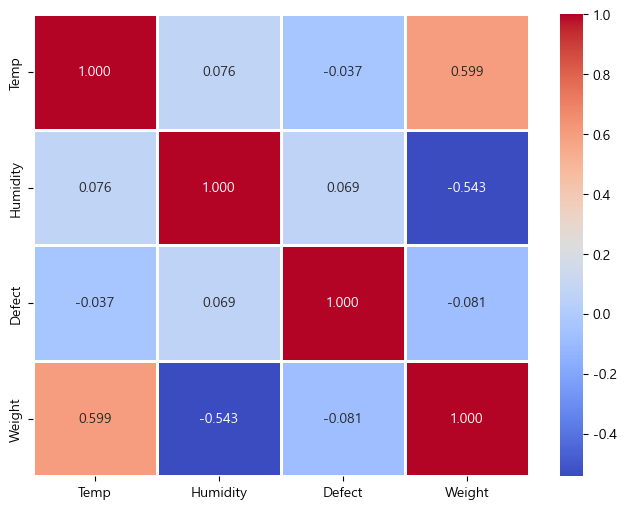

In [17]:
# 히트맵 작성하기(sns 사용)
plt.figure(figsize = (8, 6))

sns.heatmap(data = corr,
           annot = True,
           fmt = '.3f',
           cmap = 'coolwarm',
           linewidth = 1)

plt.savefig('hitmap_plot.png')
plt.show()

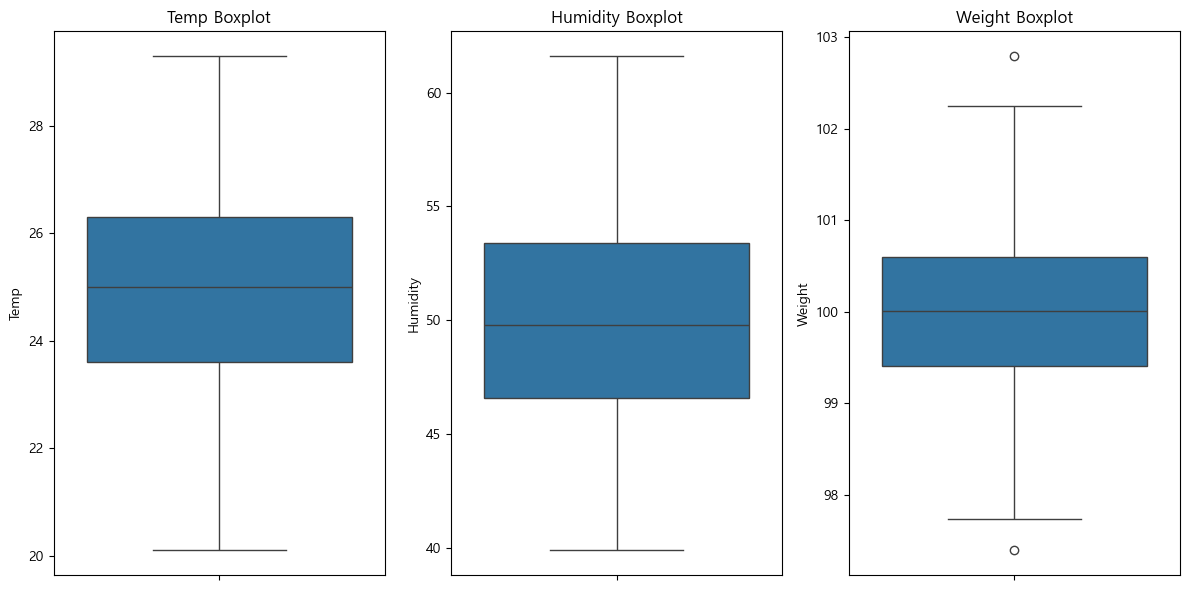

In [18]:
# 상자 그림을 그릴 수치형 데이터 컬럼들을 선택합니다.
numeric_columns = ['Temp', 'Humidity', 'Weight']

# 그래프의 전체 크기를 설정합니다.
plt.figure(figsize=(12, 6))

# for 반복문을 사용하여 각 수치형 컬럼에 대한 상자 그림을 하나씩 그립니다.
for i, col in enumerate(numeric_columns):
    # 1행 3열의 subplot 중 i+1번째 위치에 그래프를 그립니다.
    plt.subplot(1, 3, i+1)
    
    # seaborn의 boxplot 함수를 사용하여 상자 그림을 그립니다.
    sns.boxplot(y = food[col])
    
    # 각 그래프의 제목을 설정합니다.
    plt.title(f'{col} Boxplot')
    
    # 각 그래프의 y축 라벨을 설정합니다.
    plt.ylabel(col)

# 그래프들이 겹치지 않도록 레이아웃을 조정합니다.
plt.tight_layout()

plt.savefig('food_boxplot_no_outliers.png')
plt.show()

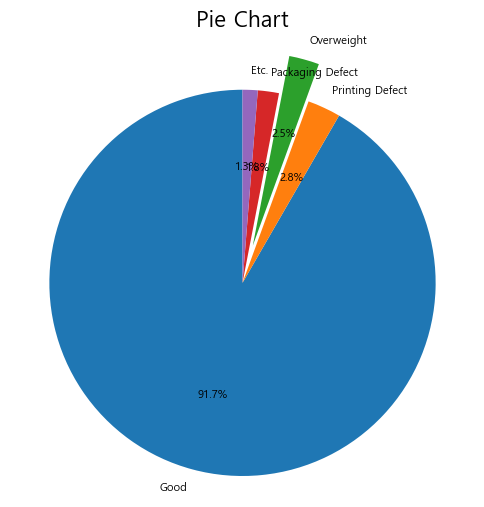

In [30]:
# 'Defect_Type' 컬럼의 값별 개수를 계산합니다.
food_counts = food['Defect_Type'].value_counts()

# 파이 차트의 한글 라벨을 영어로 변환하기 위한 딕셔너리를 정의합니다.
label_map = {
    '양품': 'Good',
    '중량초과': 'Overweight',
    '인쇄불량': 'Printing Defect',
    '포장불량': 'Packaging Defect',
    '기타': 'Etc.'
}
# 기존 라벨을 영어 라벨로 변환합니다.
english_labels = [label_map.get(label, label) for label in food_counts.index]

# 파이 차트를 생성합니다.
plt.figure(figsize = (6, 6)) # 그래프 크기 설정
plt.pie(
    food_counts,
    labels = english_labels,
    autopct = '%1.1f%%',          # 각 항목의 비율을 소수점 첫째 자리까지 표시
    startangle = 90,             # 차트가 그려지기 시작하는 각도
    explode = [0, 0, 0.2, 0, 0],
    counterclock = True,
    textprops = {'fontsize': 8}  # 텍스트 크기 설정
)
plt.title('Pie Chart', fontsize=16) # 차트 제목 설정
plt.axis('equal')  # 파이 차트를 원형으로 만듭니다.

plt.savefig('pie_chart.png')
plt.show()